<a href="https://colab.research.google.com/github/alerabello/TeoriaDaComputacao/blob/main/trabalhoTeoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FEITO POR:

Danilo Aparecido Namitala

Alexandre Rabello Santana



**- Questao 1 -**

------------------

Para somar dois numeros binarios é possivel fazer isso recursivamente, subtraindo 1 no primeiro numero e somando 1 no segundo numero até que o primeiro numero seja 0. a entrada pode ser os dois numeros como parametro e a saida pode ser escrita sobre o segundo numero mesmo. É muito importante que o segundo numero comece com um BIT 0 para a possibilidade de um carring ser passado e aumente a usa ordem, tambem é necessario que o segundo numero numero seja sempre o numero com mais bits.'


**- Questao 2 -**

-------

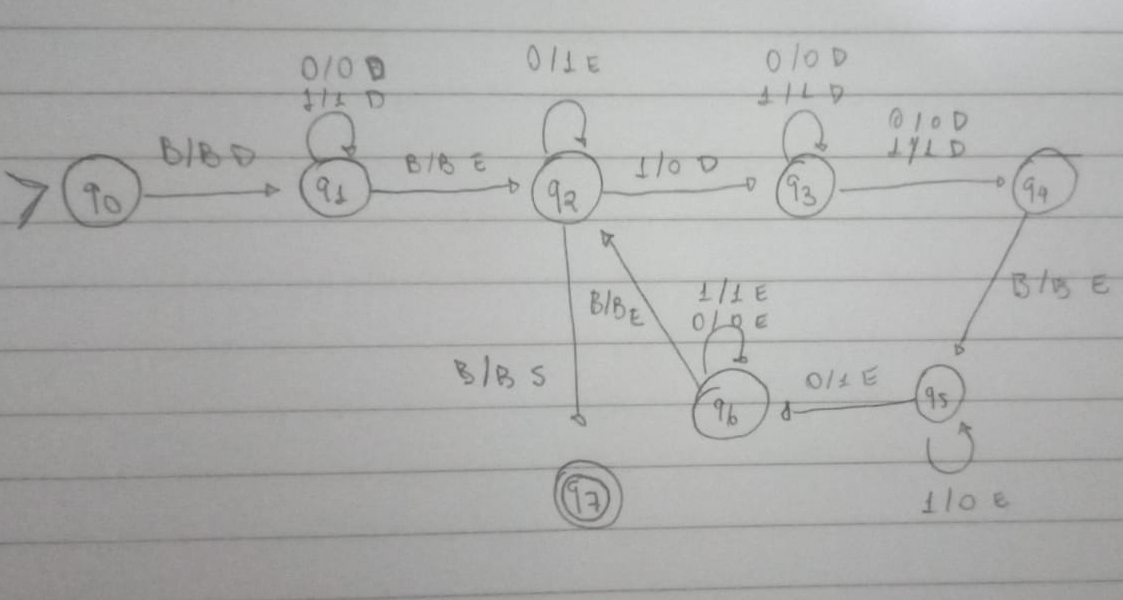

**- Questao 3 -**

---------------
M=(Q,Σ,Γ,δ,q_0)
```
M = (
  {q0,q1,q2,q3,q4,q5,q6,q7},
  {0,1},
  {0,1,B},
  {
    (q0,B) -> (q1,B,D),
    (q1,B) -> (q2,B,D),
    (q1,1) -> (q1,1,D),
    (q1,1) -> (q1,0,D),
    (q2,B) -> (q3,1,D),
    (q2,0) -> (q2,0,E),
    (q2,B) -> (q7,B,S),
    (q3,0) -> (q3,0,D),
    (q3,1) -> (q4,0,D),
    (q3,0) -> (q4,0,D),
    (q4,B) -> (q5,B,B),
    (q5,1) -> (q5,1,E),
    (q5,0) -> (q6,1,E),
    (q6,1) -> (q6, 1,E),
    (q6,0) -> (q6, 0,E),
    (q6,B) -> (q2, B, B),
  },
  q0 
)
```

**- Questao 4 -**

Maquina de turing para soma formatada como maquina universal:

glossario:

D: 11

E: 1

S: 111

1: 11

0: 1

B: 111

os estados são representados pelos seus numeros


(q0,B)->(q1,B,D) : 101110110111011

(q1,1)->(q1,1,D) : 11011011011011

(q1,0)->(q1,0,D) : 110101101011

(q1,B)->(q2,B,E) : 1101110111011101

(q2,0)->(q2,1,E) : 11101011101101

(q2,1)->(q3,0,D) : 1110110111101011

(q3,1)->(q3,1,D) : 111101101111011011

(q3,0)->(q3,0,D) : 1111010111101011

(q3,B)->(q4,B,D) : 111101110111110111011

(q4,1)->(q4,1,D) : 11111011011111011011

(q4,0)->(q4,0,D) : 111110101111101011

(q4,B)->(q5,B,E) : 1111101110111111011101

(q5,1)->(q5,0,E) : 11111101101111110101

(q5,0)->(q6,1,E) : 111111010111111101101

(q6,1)->(q6,1,E) : 11111110110111111101101

(q6,0)->(q6,0,E) : 111111101011111110101

(q6,B)->(q2,B,E) : 111111101110111011101

(q2,B)->(q7,B,S) : 111011101111111101110111

A representação da mquina para a execução na função é:

incial + 000 + mt + 000 + final

onde inicial e final são respectivamente o estado inicial e final e mt é a sequencia das transicoes separadas por 00

exemplo: 

100010111011011101100110110110110110011010110101100110111011101110100111010111011010011101101111010110011110110111101101100111101011110101100111101110111110111011001111101101111101101100111110101111101011001111101110111111011101001111110110111111010100111111010111111101101001111111011011111110110100111111101011111110101001111111011101110111010011101110111111110111011100011111111



**- Questão 5 -**

In [ ]:
def create_transition_table(maq):
  transition_table = {}
  for t in maq:
    transition = t.split("0")
    if(transition[0] in transition_table):
      transition_table[transition[0]].append(t)
    else:
      transition_table[transition[0]] = [t]
  return transition_table

def tlt(i): ## translate
  if(i == "0"):
    return "1"
  elif(i == "1"):
    return "11"
  else:
    return "111"

def tlti(i): ## translate inverse
  if(i == "1"):
    return "0"
  elif(i == "11"):
    return "1"
  else:
    return "B"

def shift(i):
  if(i == "1"):
    return -1
  elif(i == "11"):
    return 1
  else:
    return 0

def mtu(mt, w):
  final = "11111111"
  actual_state = "1" # estado inicial 0
  hpos = 0 ## head position
  can_move = True
  actual_state, maq, final = open(mt).read().split("000")
  maq = maq.split("00")  
  numbers = open(w).read().split(";")
  word = "B" + numbers[0] + "B" + numbers[1] + "B" # fita de entrada

  transition_table = create_transition_table(maq);
  transition_table[final] = []
  while(can_move):
    read = word[hpos]
    transitions = transition_table[actual_state]
    can_move = False
    for t in transitions:
      tt = t.split("0")
      if(tlti(tt[1]) == read):
        can_move = True 
        actual_state = tt[2] # muda estado
        pword = list(word)
        pword[hpos] = tlti(tt[3]) # escreve saida
        word = "".join(pword)
        hpos += shift(tt[4]) # muda posicao da cabeca de leitura
        break
  return word

In [ ]:
mtu("rm.txt","entry2.csv")

'B1111B10000B'

**- Questao 6 -** 

---------------------
A)
--
A tese de church turing diz que qualquer calculo que pode ser feito por um humano e produz um resultado com um numero finito de passos ele pode ser automatizado por uma maquina de turing com um algoritmo, ao passo que esse algoritmo deve ter um numero finito de instruções.

B)
--

Não é possivel construir uma maquina de turing que decida se uma outra maquina vai parar, é um problema indecidivel.

C)
--
a) (a, aa), (bb, b), (a, bb)

Solução: [1, 3, 2, 2]

a + a + bb + bb = aa + bb + b + b = aabbbb

---

b) (a, ab), (ba, aba), (b, aba), (bba, b)

Solução: [1, 4, 2]

a + bba + ba = ab + b + aba = abbaba

---

c) (abb, ab), (aba, ba), (aab,abab)

Não foi encontrada solução.

---


d) (ab,aba), (baa, aa), (aba, baa)

Não foi encontrada solução.

---

e) (a, aaa), (aab, b), (abaaa, ab)

Solução: [1, 2]

a + aab = aaa + b = aaab

---


f) (ab, bb), (aa, ba), (ab, abb), (bb, bab)

Não foi encontrada solução.

---

D)
--

E)
--
a)

A complexidade de uma função é dada pelo seu termo de maior ordem, em f(x) temos 4x, que cresce linearmente com o valor de X e 3x^2 que cresce em proporção quadratica, portanto sua complexidade é O(N^2). O mesmo acontece em g(x), seu unico termo é o 5x^2, a constante não interfere na complexidade, sua complexidade é então O(N^2).

b)

Nós podemos tratar pela quantidade de passos dados, veja que q1, q2 e q3, percorre toda a palavra, ali então tempos 3|w| passos, alem deles temos mais 4 passos de transição entre esses estados. o que faz com que a quantidade de passos dessa maquina relativo ao tamanho da palavra é: f(x) = 3x + 4, isto é, essa maquina tem complexidade linear O(N).


**- ADICIONAL -**

Nós usamos alguns scripts adicionais, um para conferir as correspondencias post e um para gerar a configuração da maquina universal, seguem descritos nos quadros.

Para validar a maquina de turing usamos o site: https://turingmachinesimulator.com/ com a entrada que esta no arquivo `maquina.txt`


In [ ]:
## Algoritmo usado para encontrar a solução das correspondencias de post

def suc(seq, ntipos):
  if (seq == []):
    seq = [0]
  else:
    n = len(seq)-1
    if (seq[n] < ntipos-1):
      seq[n] = seq[n]+1
    else:
      seq = suc(seq[0:n],ntipos) + [0]
  return seq

found = False;
seq = []

#list_itens = [("a", "aa"), ("bb", "b"), ("a", "bb")] # letra A
#list_itens = [("a", "ab"), ("ba", "aba"), ("b", "aba"), ("bba", "b")] # letra B
#list_itens = [("abb", "ab"), ("aba", "ba"), ("aab","abab")] # letra C
#list_itens = [("ab","aba"), ("baa", "aa"), ("aba", "baa")] # letra D
list_itens = [("a", "aaa"), ("aab", "b"), ("abaaa", "ab")] # letra E
#list_itens = [("ab", "bb"), ("aa", "ba"), ("ab", "abb"), ("bb", "bab")] # letra F

ntipos = len(list_itens)

while(not(found)):
  seq = suc(seq, ntipos)
  stra = "".join([list_itens[x][0] for x in seq])
  strb = "".join([list_itens[x][1] for x in seq])
  found = stra == strb
print([x+1 for x in seq])

[1, 2]


In [ ]:
## Geração da mquina universal com base na maquina passada pelo arquivo

itens = {
    ">":"11", 
    "<":"1",
    "-":"111",
     "B":"111",
     "1":"11",
     "0":"1",
     "q0":"1",
     "q1":"11",
     "q2":"111",
     "q3":"1111",
     "q4":"11111",
     "q5":"111111",
     "q6":"1111111",
     "q7":"11111111",
     }
f = open('input.txt')
maquina_final = "000"
line = f.readline()
while(line):
  out = ""
  proc = line.replace("\n","").split(",")
  for p in proc:
    out += "0" + itens[p]
  out = out[1:]
  print(f"({proc[0]},{proc[1]})->({proc[2]},{proc[3]},{proc[4]}) : {out}")
  maquina_final += out + "00"
  line = f.readline()
maquina_final += "0"
print(maquina_final)

(q0,B)->(q1,B,>) : 101110110111011
(q1,1)->(q1,1,>) : 11011011011011
(q1,0)->(q1,0,>) : 110101101011
(q1,B)->(q2,B,<) : 1101110111011101
(q2,0)->(q2,1,<) : 11101011101101
(q2,1)->(q3,0,>) : 1110110111101011
(q3,1)->(q3,1,>) : 111101101111011011
(q3,0)->(q3,0,>) : 1111010111101011
(q3,B)->(q4,B,>) : 111101110111110111011
(q4,1)->(q4,1,>) : 11111011011111011011
(q4,0)->(q4,0,>) : 111110101111101011
(q4,B)->(q5,B,<) : 1111101110111111011101
(q5,1)->(q5,0,<) : 11111101101111110101
(q5,0)->(q6,1,<) : 111111010111111101101
(q6,1)->(q6,1,<) : 11111110110111111101101
(q6,0)->(q6,0,<) : 111111101011111110101
(q6,B)->(q2,B,<) : 111111101110111011101
(q2,B)->(q7,B,-) : 111011101111111101110111
00010111011011101100110110110110110011010110101100110111011101110100111010111011010011101101111010110011110110111101101100111101011110101100111101110111110111011001111101101111101101100111110101111101011001111101110111111011101001111110110111111010100111111010111111101101001111111011011111110110100111111101